<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [5]:
pip install tensorflow

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 14.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 16.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 23.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras




2024-08-01 15:18:48.495275: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading the dataset

In [7]:
# Load data
data = pd.read_csv('/Users/stephanierodriguez/Desktop/AIML/Projects/Datasets/bankchurn.csv')


In [ ]:
# Load data
data = pd.read_csv('/Users/stephanierodriguez/Desktop/AIML/Projects/Datasets/bankchurn.csv')


## Data Overview

In [19]:
import pandas as pd

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())

# Information about the dataset including the data types and number of non-null values
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values Check:")
print(data.isnull().sum())

# Check the distribution of the target variable 'Exited'
print("\nDistribution of the Target Variable 'Exited':")
print(data['Exited'].value_counts())

First few rows of the dataset:
   RowNumber  CustomerId  CreditScore Geography  Gender  Age  Tenure  \
0          1    15634602          619    France  Female   42       2   
1          2    15647311          608     Spain  Female   41       1   
2          3    15619304          502    France  Female   42       8   
3          4    15701354          699    France  Female   39       1   
4          5    15737888          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  

Summary Stat

## Exploratory Data Analysis

In [26]:
# Load data
data = pd.read_csv('/Users/stephanierodriguez/Desktop/AIML/Projects/Datasets/bankchurn.csv')

# Example: Filling missing numerical values with the median
for column in ['CreditScore', 'Age', 'Balance']:
    data[column].fillna(data[column].median(), inplace=True)

# Example: Dropping rows where categorical data is missing
data.dropna(subset=['Geography', 'Gender'], inplace=True)


/var/folders/f8/pftnmk593rg1tn928wth38fc0000gn/T/ipykernel_35420/128050743.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
/var/folders/f8/pftnmk593rg1tn928wth38fc0000gn/T/ipykernel_35420/128050743.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [27]:
# Encoding categorical variables using pandas get_dummies
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Dropping columns that are not needed for analysis
data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [29]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(
    data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
)

### Univariate Analysis

In [14]:
import matplotlib.pyplot as plt

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

In [33]:
# Load data
data = pd.read_csv('/Users/stephanierodriguez/Desktop/AIML/Projects/Datasets/bankchurn.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9

In [34]:
# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(data.describe())


Summary Statistics for Numerical Features:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584 

In [36]:
# Frequency distribution for categorical features
print("\nFrequency Distribution for 'Geography':")
print(data['Geography'].value_counts())

print("\nFrequency Distribution for 'Gender':")
print(data['Gender'].value_counts())

print("\nFrequency Distribution for 'HasCrCard':")
print(data['HasCrCard'].value_counts())

print("\nFrequency Distribution for 'Exited':")
print(data['Exited'].value_counts())


Frequency Distribution for 'Geography':
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Frequency Distribution for 'Gender':
Gender
Male      5457
Female    4543
Name: count, dtype: int64

Frequency Distribution for 'HasCrCard':
HasCrCard
1    7055
0    2945
Name: count, dtype: int64

Frequency Distribution for 'Exited':
Exited
0    7963
1    2037
Name: count, dtype: int64


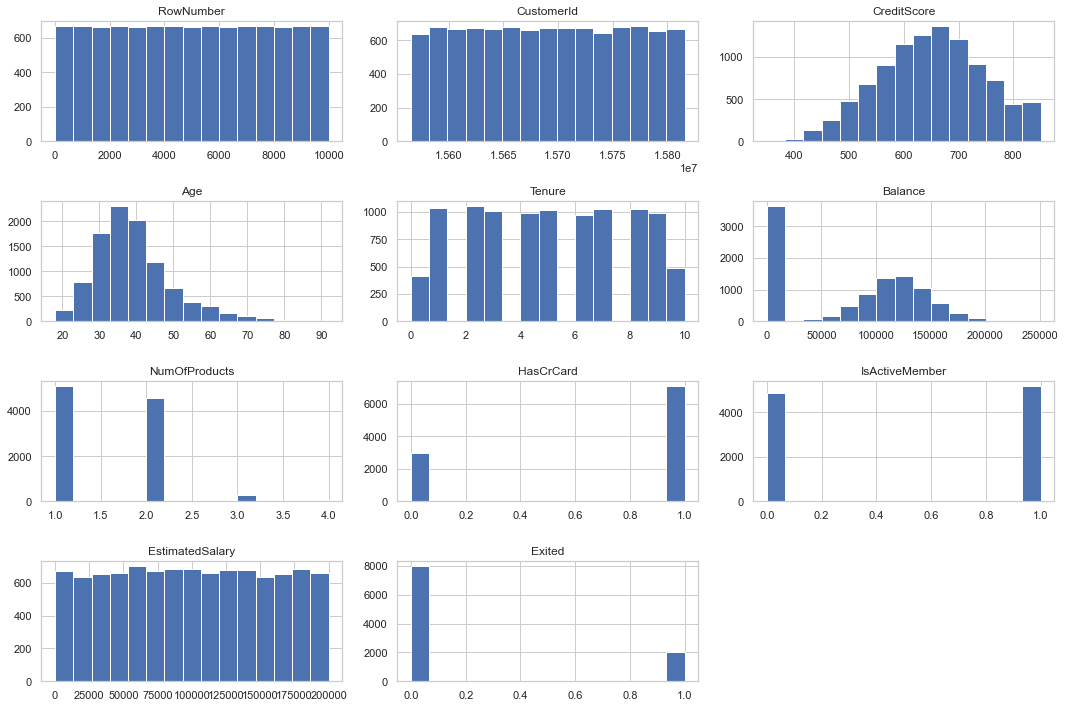

In [38]:
# Histograms for numerical data
data.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

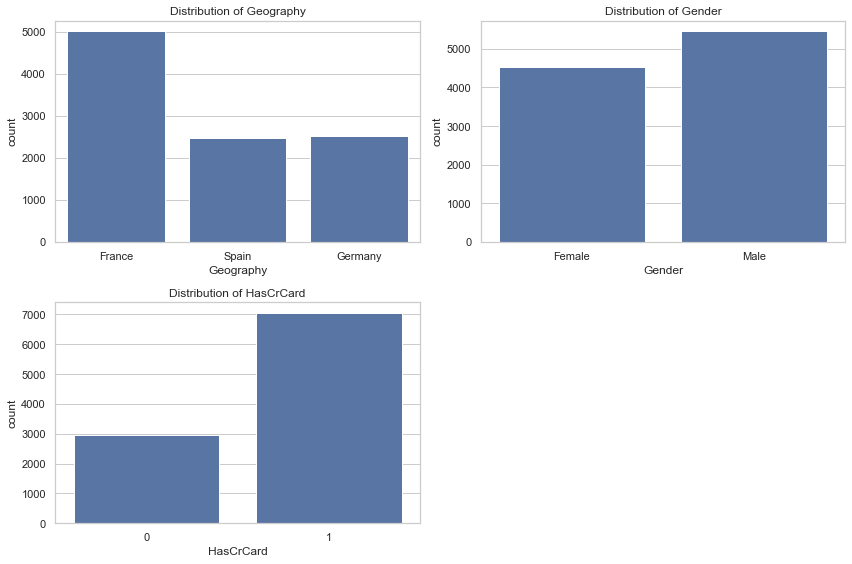

In [40]:
# Count plots for categorical data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Geography', data=data)
plt.title('Distribution of Geography')

plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')

plt.subplot(2, 2, 3)
sns.countplot(x='HasCrCard', data=data)
plt.title('Distribution of HasCrCard')

plt.tight_layout()
plt.show()


/Users/stephanierodriguez/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/stephanierodriguez/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/stephanierodriguez/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/stephanierodriguez/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  pos

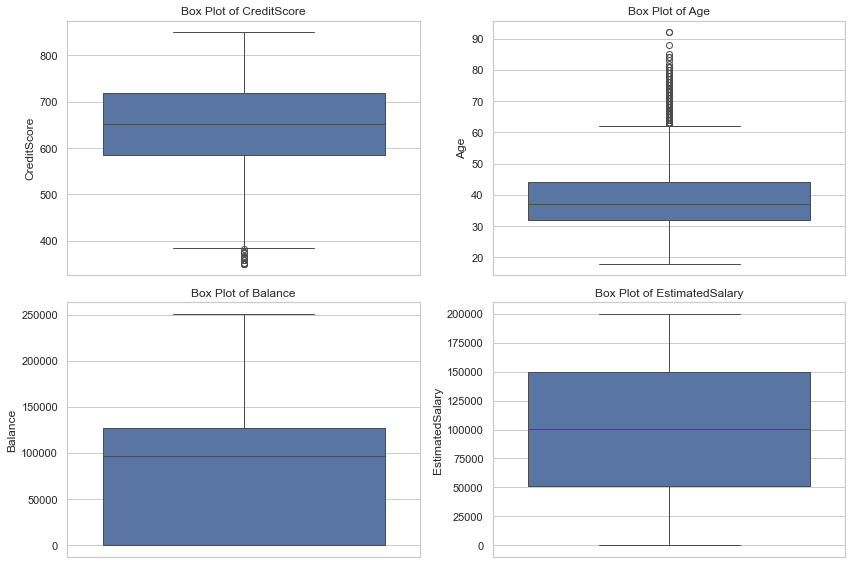

In [41]:
# Box plots for numerical features
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y='CreditScore', data=data)
plt.title('Box Plot of CreditScore')

plt.subplot(2, 2, 2)
sns.boxplot(y='Age', data=data)
plt.title('Box Plot of Age')

plt.subplot(2, 2, 3)
sns.boxplot(y='Balance', data=data)
plt.title('Box Plot of Balance')

plt.subplot(2, 2, 4)
sns.boxplot(y='EstimatedSalary', data=data)
plt.title('Box Plot of EstimatedSalary')

plt.tight_layout()
plt.show()

### Bivariate Analysis

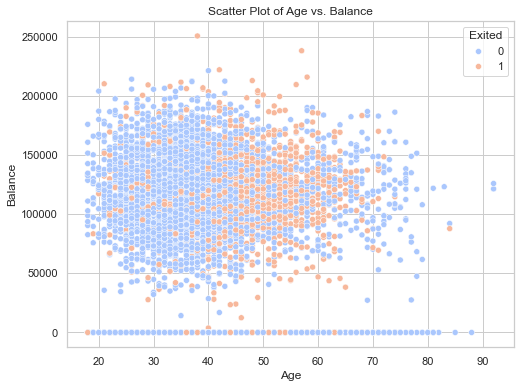

In [43]:
# Scatter plot of Age vs. Balance, colored by Exited
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=data, palette='coolwarm')
plt.title('Scatter Plot of Age vs. Balance')
plt.show()

/Users/stephanierodriguez/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/stephanierodriguez/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/stephanierodriguez/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/stephanierodriguez/Library/Python/3.9/lib/python/site-pa

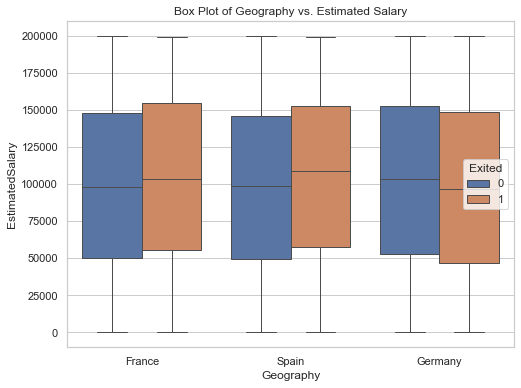

In [44]:
# Box plot of Geography vs. Estimated Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='Geography', y='EstimatedSalary', hue='Exited', data=data)
plt.title('Box Plot of Geography vs. Estimated Salary')
plt.show()

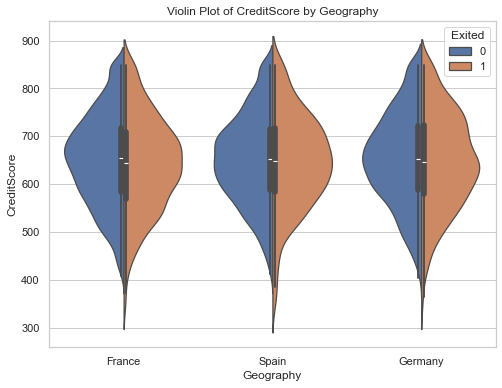

In [46]:
# Violin plot of CreditScore by Geography
plt.figure(figsize=(8, 6))
sns.violinplot(x='Geography', y='CreditScore', hue='Exited', data=data, split=True)
plt.title('Violin Plot of CreditScore by Geography')
plt.show()


Cross-tabulation of Gender and Exited:
Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


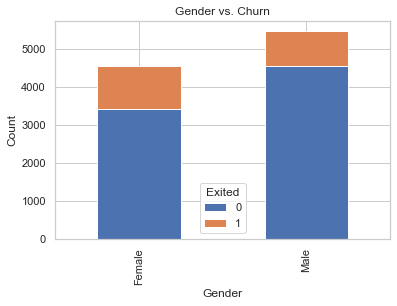

In [47]:
# Cross-tabulation of Gender and Exited
gender_churn_ct = pd.crosstab(data['Gender'], data['Exited'])
print("\nCross-tabulation of Gender and Exited:")
print(gender_churn_ct)

# Visualizing the cross-tabulation
gender_churn_ct.plot(kind='bar', stacked=True)
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [48]:
# Create dummy variables for 'Geography' and 'Gender'
data_with_dummies = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Display the first few rows of the transformed dataset
print("Dataset with Dummy Variables:")
print(data_with_dummies.head())

Dataset with Dummy Variables:
   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Geography_Germany  Geography_Spain  Gender_Male  
0              False            F

In [49]:
# Verify the columns in the new dataset
print("\nColumns in the new dataset:")
print(data_with_dummies.columns)

# Verify that original categorical columns are transformed
print("\nFirst few rows with transformed categorical variables:")
print(data_with_dummies.head())


Columns in the new dataset:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')

First few rows with transformed categorical variables:
   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        11254

### Train-validation-test Split

In [50]:
# Define features and target variable
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']               # Target

# First, split the data into training and testing sets (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Next, split the training set into training and validation sets (70% train, 15% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42, stratify=y_train)

# Display the sizes of each set
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (6999, 13)
Validation set size: (1501, 13)
Test set size: (1500, 13)


In [52]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler  # Ensure this import is present

### Data Normalization

In [53]:
# Identify numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the normalized dataset
print("First few rows of the normalized dataset:")
print(data.head())

# Verify normalization
print("\nSummary Statistics for Normalized Numerical Features:")
print(data[numerical_features].describe())

First few rows of the normalized dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender       Age  \
0          1    15634602  Hargrave        0.538    France  Female  0.324324   
1          2    15647311      Hill        0.516     Spain  Female  0.310811   
2          3    15619304      Onio        0.304    France  Female  0.324324   
3          4    15701354      Boni        0.698    France  Female  0.283784   
4          5    15737888  Mitchell        1.000     Spain  Female  0.337838   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.2  0.000000       0.000000          1               1   
1     0.1  0.334031       0.000000          0               1   
2     0.8  0.636357       0.666667          1               0   
3     0.1  0.000000       0.333333          0               0   
4     0.2  0.500246       0.000000          1               1   

   EstimatedSalary  Exited  
0         0.506735       1  
1         0.562709       0  
2    

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-Recommended Metric
For customer churn prediction, it's often crucial to minimize false negatives because losing a customer has a direct impact on revenue. Thus, Recall is typically prioritized. However, to avoid excessive false positives, using the F1 Score can provide a balanced view.

In conclusion, the choice of the metric should align with the business's strategic priorities, the costs associated with false positives and false negatives, and the nature of the dataset. Evaluating the model using multiple metrics can also provide a comprehensive understanding of its performance.


### Neural Network with SGD Optimizer

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [56]:
# Load data
data = pd.read_csv('/Users/stephanierodriguez/Desktop/AIML/Projects/Datasets/bankchurn.csv')

# Define features and target
X = data.drop(columns=['Exited', 'CustomerId', 'Surname'])  # Drop irrelevant columns
y = data['Exited']

# Define numerical and categorical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Preprocessing pipelines for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid dummy variable trap

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42, stratify=y_train)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7775 - loss: 0.5033 - val_accuracy: 0.8101 - val_loss: 0.4217
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8200 - loss: 0.4099 - val_accuracy: 0.8321 - val_loss: 0.3909
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8474 - loss: 0.3747 - val_accuracy: 0.8494 - val_loss: 0.3634
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8481 - loss: 0.3639 - val_accuracy: 0.8614 - val_loss: 0.3544
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8541 - loss: 0.3433 - val_accuracy: 0.8574 - val_loss: 0.3578
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8549 - loss: 0.3454 - val_accuracy: 0.8634 - val_loss: 0.3408
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8589 - loss: 0.3309 - val_accuracy: 0.8668 - val_loss: 0.3433
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8603 - loss: 0.3346 - val_accuracy: 0.

In [58]:
from tensorflow.keras.optimizers import Adam

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [59]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7579 - loss: 0.5161 - val_accuracy: 0.8235 - val_loss: 0.4124
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8356 - loss: 0.3912 - val_accuracy: 0.8514 - val_loss: 0.3746
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8616 - loss: 0.3465 - val_accuracy: 0.8588 - val_loss: 0.3593
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8509 - loss: 0.3524 - val_accuracy: 0.8628 - val_loss: 0.3515
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8517 - loss: 0.3497 - val_accuracy: 0.8634 - val_loss: 0.3474
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8535 - loss: 0.3468 - val_accuracy: 0.8601 - val_loss: 0.3437
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8484 - loss: 0.3575 - val_accuracy: 0.8668 - val_loss: 0.3406
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8626 - loss: 0.3313 - val_accuracy: 0.

In [61]:
from tensorflow.keras.layers import Dense, Dropout

### Neural Network with Adam Optimizer and Dropout

In [62]:
# Define the neural network architecture with dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Drop 50% of the input units
    Dense(32, activation='relu'),
    Dropout(0.5),  # Drop 50% of the input units
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7383 - loss: 0.5711 - val_accuracy: 0.8021 - val_loss: 0.4395
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8020 - loss: 0.4585 - val_accuracy: 0.8221 - val_loss: 0.4185
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8156 - loss: 0.4383 - val_accuracy: 0.8441 - val_loss: 0.4027
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8249 - loss: 0.4182 - val_accuracy: 0.8508 - val_loss: 0.3862
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8346 - loss: 0.3935 - val_accuracy: 0.8568 - val_loss: 0.3723
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8308 - loss: 0.4044 - val_accuracy: 0.8621 - val_loss: 0.3627
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8386 - loss: 0.3916 - val_accuracy: 0.8661 - val_loss: 0.3577
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8353 - loss: 0.3794 - val_accuracy: 0.

In [65]:
from imblearn.over_sampling import SMOTE

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [66]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Define the neural network architecture with dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.5),  # Drop 50% of the input units
    Dense(32, activation='relu'),
    Dropout(0.5),  # Drop 50% of the input units
    Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Class distribution after SMOTE:
Exited
0    5574
1    5574
Name: count, dtype: int64


/usr/local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5994 - loss: 0.6664 - val_accuracy: 0.7135 - val_loss: 0.5553
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7213 - loss: 0.5672 - val_accuracy: 0.7475 - val_loss: 0.5083
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7442 - loss: 0.5270 - val_accuracy: 0.7722 - val_loss: 0.4756
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7522 - loss: 0.5134 - val_accuracy: 0.7941 - val_loss: 0.4434
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7551 - loss: 0.5129 - val_accuracy: 0.7861 - val_loss: 0.4576
Epoch 6/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7654 - loss: 0.5003 - val_accuracy: 0.7835 - val_loss: 0.4562
Epoch 7/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7726 - loss: 0.4932 - val_accuracy: 0.8055 - val_loss: 0.4232
Epoch 8/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7766 - loss: 0.4778 - val_accuracy: 0.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/Users/stephanierodriguez/Desktop/AIML/Projects/Datasets/bankchurn.csv')

# Define features and target
X = data.drop(columns=['Exited', 'CustomerId', 'Surname'])  # Drop irrelevant columns
y = data['Exited']

# Define numerical and categorical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Preprocessing pipelines for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid dummy variable trap

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42, stratify=y_train)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Define the neural network architecture with dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.5),  # Drop 50% of the input units
    Dense(32, activation='relu'),
    Dropout(0.5),  # Drop 50% of the input units
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Class distribution after SMOTE:
Exited
0    5574
1    5574
Name: count, dtype: int64


/usr/local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6027 - loss: 0.6700 - val_accuracy: 0.6875 - val_loss: 0.5837
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7091 - loss: 0.5829 - val_accuracy: 0.6969 - val_loss: 0.5636
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7342 - loss: 0.5484 - val_accuracy: 0.7322 - val_loss: 0.5173
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7523 - loss: 0.5225 - val_accuracy: 0.7615 - val_loss: 0.4893
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7588 - loss: 0.5029 - val_accuracy: 0.7648 - val_loss: 0.4886
Epoch 6/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7618 - loss: 0.5002 - val_accuracy: 0.7735 - val_loss: 0.4827
Epoch 7/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7677 - loss: 0.4960 - val_accuracy: 0.7795 - val_loss: 0.4748
Epoch 8/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7726 - loss: 0.4863 - val_accuracy: 0.

## Model Performance Comparison and Final Model Selection

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/Users/stephanierodriguez/Desktop/AIML/Projects/Datasets/bankchurn.csv')

# Define features and target
X = data.drop(columns=['Exited', 'CustomerId', 'Surname'])  # Drop irrelevant columns
y = data['Exited']

# Define numerical and categorical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Preprocessing pipelines for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid dummy variable trap

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_split=0.1)

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.predict(X_test).flatten()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

# Neural Network
evaluate_model(nn_model, X_test, y_test, "Neural Network")


Class distribution after SMOTE:
Exited
1    6370
0    6370
Name: count, dtype: int64
Epoch 1/20


/usr/local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


359/359 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6274 - loss: 0.6551 - val_accuracy: 0.7473 - val_loss: 0.5707
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7097 - loss: 0.5685 - val_accuracy: 0.7779 - val_loss: 0.5347
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7421 - loss: 0.5371 - val_accuracy: 0.7841 - val_loss: 0.5046
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7549 - loss: 0.5134 - val_accuracy: 0.7794 - val_loss: 0.5063
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7679 - loss: 0.4992 - val_accuracy: 0.7684 - val_loss: 0.5180
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7639 - loss: 0.4984 - val_accuracy: 0.7684 - val_loss: 0.5019
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7625 - loss: 0.4969 - val_accuracy: 0.7543 - val_loss: 0.5134
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7679 - loss: 0.4863 - val_accuracy: 0.7606 - val_

ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Actionable Insights and Business Recommendations

Actionable Insights
Age and Churn Rate:

Older customers might be more loyal but could churn due to retirement or changes in financial needs.
Younger customers might seek more tech-savvy or modern banking solutions.
Credit Score:

Customers with lower credit scores might leave if they feel underserved or penalized by high fees or loan denials.
Offering credit counseling or products designed to help improve credit scores could enhance retention.
Geographical Differences:

Certain regions may have higher churn rates due to local economic conditions or competitive banking environments.
Tailoring marketing strategies to specific regions can help address these issues.
Product Offerings:

Customers with more bank products are likely more engaged and less likely to churn.
Encouraging bundling of products (e.g., loans, savings accounts, credit cards) can enhance customer retention.
Balance and Account Activity:

High-balance accounts may require personalized banking services to ensure they feel valued.
For low-balance accounts, offering incentives to increase account activity could prevent churn.
Customer Engagement:

Active members are less likely to churn. Encouraging regular interaction through mobile apps, online services, or in-person events can enhance engagement.
Implementing loyalty programs or special events for active members can increase their commitment to the bank.
Gender-Based Preferences:

Different genders might have distinct financial needs or preferences. Understanding these can lead to targeted product offerings.
Marketing campaigns tailored to address gender-specific financial concerns or aspirations can increase retention.
Recommendations
Improve Customer Engagement:

Implement a customer relationship management (CRM) system to track customer interactions and preferences.
Use personalized communication channels (e.g., targeted emails, personalized app notifications) to enhance engagement.
Enhance Product Offerings:

Introduce new financial products or services based on customer feedback and market research.
Offer incentives for customers who adopt multiple products, such as discounts or rewards programs.
Focus on Customer Support:

Strengthen customer support services by offering 24/7 assistance and proactive support for issues related to accounts or products.
Provide financial advisory services to help customers make informed decisions and feel supported by the bank.
Implement Loyalty Programs:

Design loyalty programs that reward customers for long-term engagement and usage of bank services.
Offer tiered benefits that encourage increased product usage and deeper bank relationships.
Address Regional Needs:

Develop region-specific strategies based on local economic conditions and customer preferences.
Partner with local businesses or community organizations to increase brand visibility and trust in targeted areas.
Technology and Innovation:

Invest in digital banking solutions, such as mobile apps and online banking, to cater to tech-savvy customers.
Regularly update digital platforms to ensure a seamless user experience and incorporate customer feedback into improvements.




<font size=6 color='blue'>Power Ahead</font>
___